In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

채무불이행 예측 프로세스

target: flag_risk

### 1. EDA를 통한 데이터 파악
### 2. 모델링
### 3. 추가 모델링


# EDA

In [ ]:
train=pd.read_csv("/content/drive/Shareddrives/22-2 캡스톤 프로젝트/데이터/Training Data.csv")
test=pd.read_csv("/content/drive/Shareddrives/22-2 캡스톤 프로젝트/데이터/Test Data.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 28000 non-null  int64 
 1   Income             28000 non-null  int64 
 2   Age                28000 non-null  int64 
 3   Experience         28000 non-null  int64 
 4   Married/Single     28000 non-null  object
 5   House_Ownership    28000 non-null  object
 6   Car_Ownership      28000 non-null  object
 7   Profession         28000 non-null  object
 8   CITY               28000 non-null  object
 9   STATE              28000 non-null  object
 10  CURRENT_JOB_YRS    28000 non-null  int64 
 11  CURRENT_HOUSE_YRS  28000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.6+ MB


# 클래스 불균형 확인

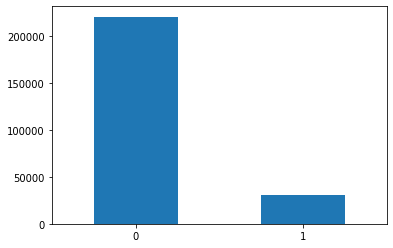

In [ ]:
train['Risk_Flag'].value_counts().plot.bar(rot=0)

In [ ]:
train['Risk_Flag'].value_counts()[0]/train['Risk_Flag'].value_counts()[1]

7.130081300813008

# 결측치 확인

In [ ]:
train.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

# object 타입 변수 확인

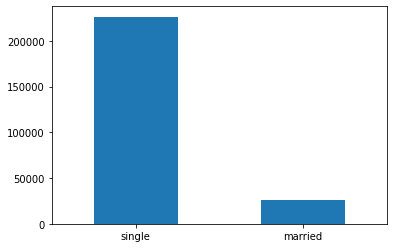

In [ ]:
train['Married/Single'].value_counts().plot.bar(rot=0)

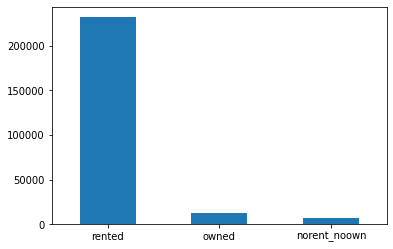

In [ ]:
train['House_Ownership'].value_counts().plot.bar(rot=0)

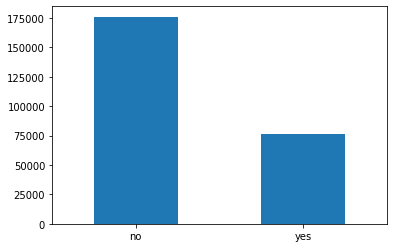

In [ ]:
train['Car_Ownership'].value_counts().plot.bar(rot=0)

In [ ]:
train['Profession'].value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [ ]:
train['CITY'].value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [ ]:
train['STATE'].value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

인코딩

In [ ]:
new_train = pd.get_dummies(train)
new_test=pd.get_dummies(test)

In [ ]:
new_train.head()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,1,1303834,23,3,3,13,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,7574516,40,10,9,13,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3991815,66,4,4,10,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,6256451,41,2,2,12,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5768871,47,11,3,14,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


# 상관계수
와우 정말 상관 없음. 다중 공선성 없음

In [ ]:
fig, ax = plt.subplots( figsize=(7,7) )
sns.heatmap(data = new_train.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='RdYlBu_r',cbar_kws={"shrink": .5},
vmin = -1,vmax = 1)
plt.show()

In [ ]:
train.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


# 모델링 : AutoML

In [ ]:
!pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
y=train['Risk_Flag']
X=train.drop(['Risk_Flag'],axis=1)


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from autosklearn.classification import AutoSklearnClassifier

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# define search
model = AutoSklearnClassifier(time_left_for_this_task=2*60, per_run_time_limit=60, n_jobs=8)
# perform the search
model.fit(X_train, y_train)
# summarize
print(model.sprint_statistics())
# evaluate best model
y_hat = model.predict(X_test)
acc = accuracy_score(y_test, y_hat)
print("Accuracy: %.3f" % acc)

auto-sklearn results:
  Dataset name: a4309b26-5b89-11ed-8342-0242ac1c0002
  Metric: accuracy
  Number of target algorithm runs: 16
  Number of successful target algorithm runs: 0
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 16
  Number of target algorithms that exceeded the memory limit: 0

Accuracy: 0.876


In [ ]:
pip install --user -U scikit-learn==0.23.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-learn==0.23.2 --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# AUTOML 자동 전처리

In [ ]:
from pycaret.classification import *
exp_name = setup(data = train,  target = 'Risk_Flag')

,Description,Value
0,session_id,2598
1,Target,Risk_Flag
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(252000, 13)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=['Id'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Risk_Flag',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeri...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

# 모델 성능 비교

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8996,0.9384,0.5365,0.6079,0.5699,0.5133,0.5146,169.871
et,Extra Trees Classifier,0.8988,0.9380,0.5141,0.6090,0.5574,0.5007,0.5031,256.733
knn,K Neighbors Classifier,0.8887,0.8750,0.5006,0.5573,0.5274,0.4645,0.4654,25.481
dt,Decision Tree Classifier,0.8846,0.8501,0.5524,0.5335,0.5427,0.4767,0.4768,52.986
lightgbm,Light Gradient Boosting Machine,0.8778,0.8236,0.0229,0.7360,0.0444,0.0372,0.1153,3.638
gbc,Gradient Boosting Classifier,0.8761,0.6472,0.0016,0.7075,0.0031,0.0025,0.0284,131.202
lr,Logistic Regression,0.8760,0.5036,0.0000,0.0000,0.0000,0.0000,0.0000,5.952
nb,Naive Bayes,0.8760,0.5129,0.0000,0.0000,0.0000,0.0000,0.0000,0.971
ridge,Ridge Classifier,0.8760,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.492
ada,Ada Boost Classifier,0.8760,0.5988,0.0001,0.1500,0.0003,0.0002,0.0040,27.987


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2598, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


# 파라미터 튜닝

In [ ]:
best_tune = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8763,0.5922,0.0032,0.7778,0.0064,0.0054,0.0448
1,0.8763,0.5828,0.0027,0.8571,0.0055,0.0047,0.0443
2,0.8762,0.5791,0.0027,0.7500,0.0055,0.0046,0.0405
3,0.8762,0.6011,0.0023,0.8333,0.0046,0.0039,0.0397
4,0.8760,0.5761,0.0014,0.5000,0.0027,0.0021,0.0210
5,0.8761,0.5821,0.0014,0.7500,0.0027,0.0023,0.0286
6,0.8761,0.5927,0.0032,0.6364,0.0064,0.0051,0.0388
7,0.8762,0.5814,0.0032,0.7000,0.0064,0.0052,0.0416
8,0.8761,0.5901,0.0023,0.7143,0.0046,0.0038,0.0357


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=4, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
                       oob_score=False, random_state=2598, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


# 모델 학습 정보 시각화

In [ ]:
evaluate_model(best_tune)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=4, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
                       oob_score=False, random_state=2598, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

예측

In [ ]:
predict_model(best_tune)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=4, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
                       oob_score=False, random_state=2598, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8795,0.5833,0.0022,0.7407,0.0044,0.0037,0.036


,Income,Age,Experience,Married/Single_married,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_Air_traffic_controller,Profession_Analyst,...,CURRENT_JOB_YRS_8,CURRENT_JOB_YRS_9,CURRENT_HOUSE_YRS_10,CURRENT_HOUSE_YRS_11,CURRENT_HOUSE_YRS_12,CURRENT_HOUSE_YRS_13,CURRENT_HOUSE_YRS_14,Risk_Flag,Label,Score
0,6380698.0,23.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8731
1,5687470.0,29.0,13.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.8741
2,5465804.0,32.0,10.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0.8804
3,818474.0,54.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.8802
4,450688.0,72.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.8808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75596,3642033.0,32.0,17.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8669
75597,4426694.0,62.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.8840
75598,9744011.0,44.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.8530
75599,46244.0,36.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.8773
